In [84]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stop_words = stopwords.words('english')
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
btctweets_df = pd.read_csv('/content/Bitcoin_tweets.csv', encoding = 'utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
btctweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573255 entries, 0 to 2573254
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        object 
dtypes: float64(1), object(12)
memory usage: 255.2+ MB


In [88]:
btctweets_df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [90]:
#cleaning/preprocessing the dataframe

#removing bots
def preproc(y):
  mod1=y[(y.is_retweet == False) &
          (y['user_name'].str.contains("Bot|bot|Alert|alert|🤖") == False) &
          (y['user_description'].str.contains("Bot|bot|Alert|alert|🤖") == False)]
  btc_mod1=mod1[['date', 'text']]
  
  return btc_mod1

#removing stop words and stemming
def stop_stem(x):
  x['text']=x['text'].str.lower()
  x['text']=x['text'].str.replace('[^a-zA-Z]', ' ')
  x['text']=x['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
  x['text']=x['text'].str.split()
  x['stem_txt']=x['text'].apply(lambda x: [stemmer.stem(y) for y in x])
  btc_mod2=x.drop(columns=['text'])

  return btc_mod2


btctweets_df_nobots=preproc(btctweets_df)
btctweets_df_alltime=stop_stem(btctweets_df_nobots)
btctweets_df_alltime #15min run

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


,date,stem_txt
0,2021-02-10 23:59:04,"[blue, ridg, bank, share, halt, nyse, bitcoin,..."
1,2021-02-10 23:58:48,"[today, thursday, take, friend, leowandersleb,..."
2,2021-02-10 23:54:48,"[guy, even, read, articl, btc, would, like, sh..."
3,2021-02-10 23:54:33,"[btc, big, chanc, billion, price, bitcoin, fx,..."
4,2021-02-10 23:54:06,"[network, secur, node, today, soon, biggest, b..."
...,...,...
2573249,2022-03-14 19:37:43,"[inmortalcrypto, look, btc, indic, right, see,..."
2573250,2022-03-14 19:37:32,"[tell, plenti, hold, paper, take, physic, deli..."
2573251,2022-03-14 19:37:32,"[tewl, icv, xyn, vr, c, chmqds, ixa, qwvc, hel..."
2573252,2022-03-14 19:37:28,"[top, losser, list, today, imx, usdt, profit, ..."


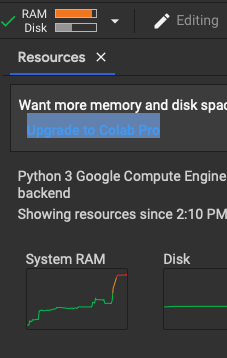

In [98]:
#example dataset 1 - Monthly observations (Feb 9-14th)

def week_sub(x):
  start_date='2022-02-01'
  end_date='2022-03-01'
  cond=(x['date'] >= start_date) & (x['date'] < end_date)
  btc_mod3=x.loc[cond]

  return btc_mod3

btctweets_week=week_sub(btctweets_df_alltime)
btctweets_week

,date,stem_txt
2259621,2022-02-09 23:59:54,"[whoop, know, behind, btc, btc, bitcoin, https..."
2259622,2022-02-09 23:59:54,"[sheep, run, lion, bitcoin, hodl]"
2259623,2022-02-09 23:59:53,"[https, co, vlzwncihk, amp, https, co, pbvywfl..."
2259624,2022-02-09 23:59:51,"[rippl, xrp, skyrocket, activ, address, networ..."
2259625,2022-02-09 23:59:50,"[new, collect, opensea, check, nftcollect, nft..."
...,...,...
2339089,2022-02-14 20:29:42,"[new, post, bitcoin, fundrais, ottawa, trucker..."
2339090,2022-02-14 20:29:36,"[guy, follow, thread, finish, happi, end, thet..."
2339092,2022-02-14 20:29:32,"[largest, cross, border, arbitrag, seen, cross..."
2339093,2022-02-14 20:29:31,"[largest, exchang, premium, amp, discount, see..."


In [86]:
df=btctweets_df_alltime[0:1000]
df

,date,text
0,2021-02-10 23:59:04,blue ridge bank shares halted nyse bitcoin atm...
1,2021-02-10 23:58:48,today thursday take friend leowandersleb btc w...
2,2021-02-10 23:54:48,guys evening read article btc would like share...
3,2021-02-10 23:54:33,btc big chance billion price bitcoin fx btc cr...
4,2021-02-10 23:54:06,network secured nodes today soon biggest bears...
...,...,...
1113,2021-02-10 16:39:40,latest events transaction volume bitcoin reach...
1117,2021-02-10 16:38:02,trillionusd worries way btc bitcoin
1118,2021-02-10 16:37:20,bitcoin market value wednesday february centra...
1120,2021-02-10 16:37:14,plus coin designed improve healthcare supply c...
